# Heart Disease
Content:
1. [Introduction](#1)
1.  [Load and check data](#2)
1. [Check Missing Data with missingno](#3)
1. [Visualization](#4)
1. [Machine learning- Manuel And SckitLearns](#5)
    * [All Accuracy with Sklearn](#6)
    * [Descriptions of our models](#7)
        * [Light GBM(lgbm)](#8)
        * [Logistic Regression](#9)
        * [K-Nearest Neighbour (KNN) Classification](#10)
        * [Random Forest Classifier](#11)
        * [XGBoost Classifier](#12)



<a id = "1"></a>
# Introduction
According to the columns, we have a data set that shows whether individuals have heart disease. First we will process and visualize the data by making it meaningful, then we will predict the individuals who have heart disease by using the Machine Learning algorithms,


**Good reading!**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno # check missing value
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


<a id = "2"></a>
# Load And Check Data
Load the data

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')

Let's Check a head

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We have 11 Columns;
* Age: Person's Age
* Sex: The person's Sex (1= Male 0= Female)
* cp: Chest pain degrees(1: typical angina, 2: atypical angina, 3: non-anginal pain,  4: asymptomatic)
* testbps: Resting Blood pressure(mmHg)
* Chol:  person's cholesterol in mg/dl
* fbs:  person's  blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: person's maximum heart rate 
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment ( 1: upsloping,  2: flat,  3: downsloping)
* ca: Large number of vessels (0-3)
* thal:Blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id = "3"></a>
# Check Missing Data with missingno

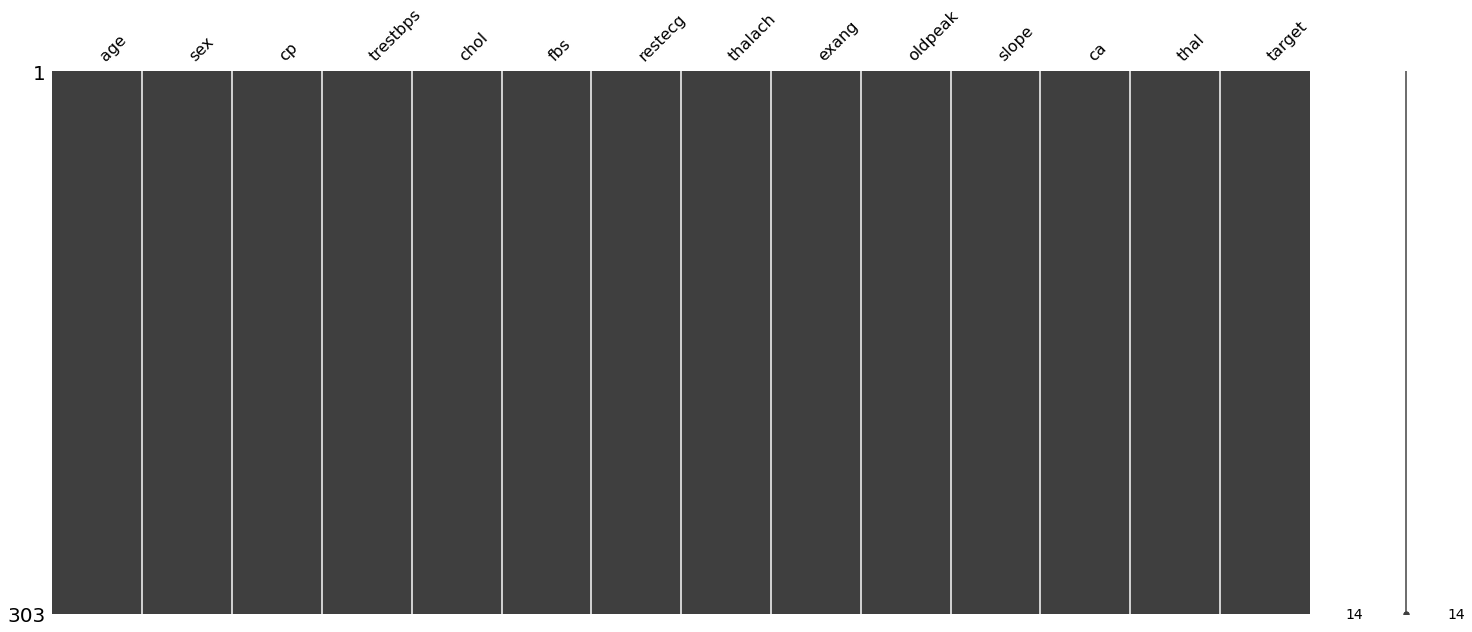

In [6]:
msno.matrix(data)

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So we haven't missing data

<a id = "4"></a>
# Visualization

In [8]:
# import The libs.
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()

Loading BokehJS ...

In [9]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'
data.columns = ['age', 'sex', 'chest_pain_degree', 'blood_pressure', 'cholesterol', 'blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'long_vessels', 'thalassemia', 'target']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



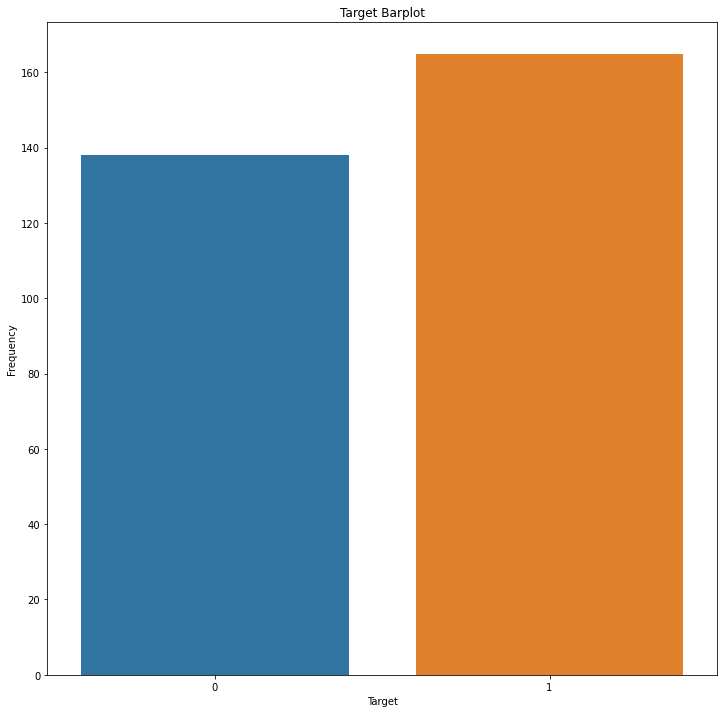

In [10]:
plt.figure(figsize = (12,12))
sns.barplot(x = data['target'].value_counts().index,
           y=data['target'].value_counts().values)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Target Barplot')
plt.show()

In [11]:
data.head()

,age,sex,chest_pain_degree,blood_pressure,cholesterol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,long_vessels,thalassemia,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
fig = go.Figure([go.Bar(x=data["chest_pain_degree"], y=data["target"])])
fig.update_layout(title_text="Chest_Pain_degree-Target")
py.iplot(fig, filename="test")

In [13]:
fig = go.Figure([go.Bar(x = data["long_vessels"],y = data["target"])])
fig.update_layout(title_text ="vessels-target")
py.iplot(fig, filename = "test")

In [14]:
fig = go.Figure([go.Bar(x = data['st_depression'],y = data['target'])])
fig.update_layout(title_text = 'Depression-target')
py.iplot(fig,filename = 'test')

In [15]:
fig = go.Figure([go.Bar(x = data['max_heart_rate'],y = data['target'])])
fig.update_layout(title_text = 'max_heart_rate-Target')
py.iplot(fig,filename = 'test')

In [16]:
fig = go.Figure([go.Bar(x=data["sex"], y=data["target"])])
fig.update_layout(title_text="sex-Target")
py.iplot(fig, filename="test") 

As can be seen, men have higher rates of heart disease than women.

In [17]:
data.groupby('target').mean()

,age,chest_pain_degree,blood_pressure,cholesterol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,long_vessels,thalassemia
target,,,,,,,,,,,,
0,56.601449,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212



49/5000
# Age by target visualization in two different ways

In [18]:
fig = go.Figure([go.Bar(x=data["age"], y=data["target"])])
fig.update_layout(title_text="Target by age")
py.iplot(fig, filename="test") 

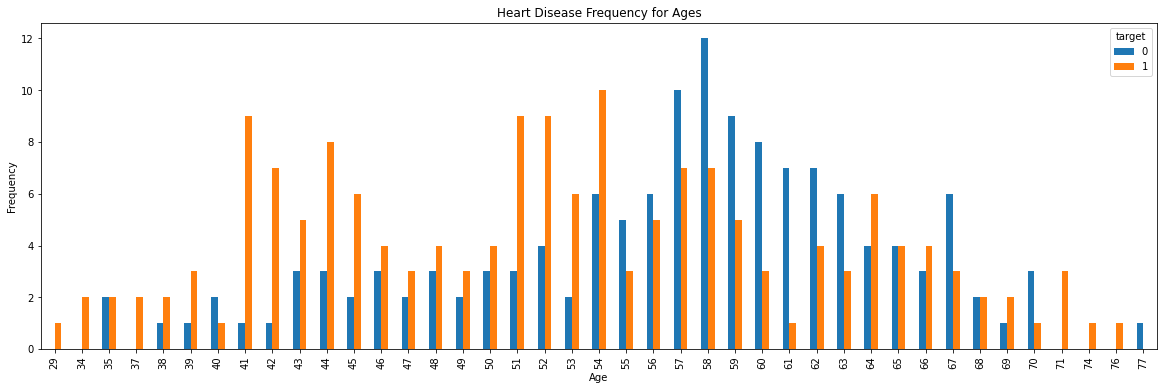

In [19]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

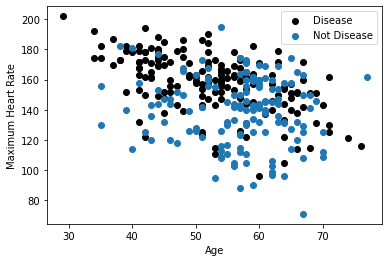

In [20]:
#scatter plot (Maximum_heart_rate-Age) Colors(target)
plt.scatter(x=data.age[data.target==1], y=data.max_heart_rate[(data.target==1)], color="black")
plt.scatter(x=data.age[data.target==0], y=data.max_heart_rate[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

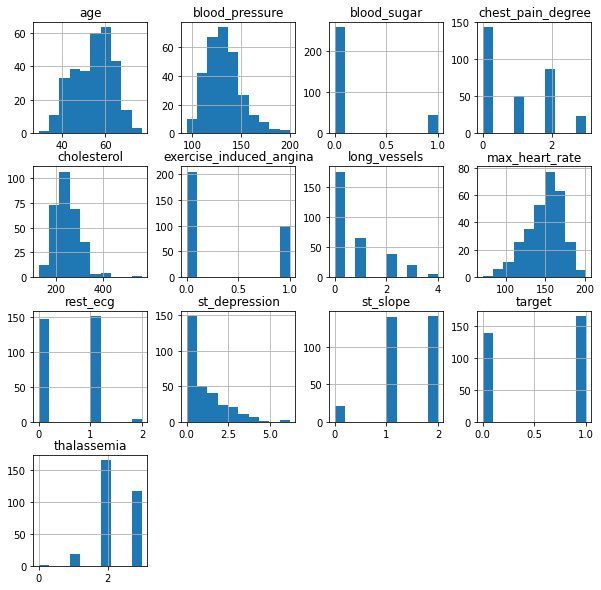

In [21]:
hist = data.hist(figsize =(10,10))

Lets Check the Correlation 

In [22]:
data.corr()

,age,chest_pain_degree,blood_pressure,cholesterol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,long_vessels,thalassemia,target
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
chest_pain_degree,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
blood_pressure,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
blood_sugar,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
st_slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


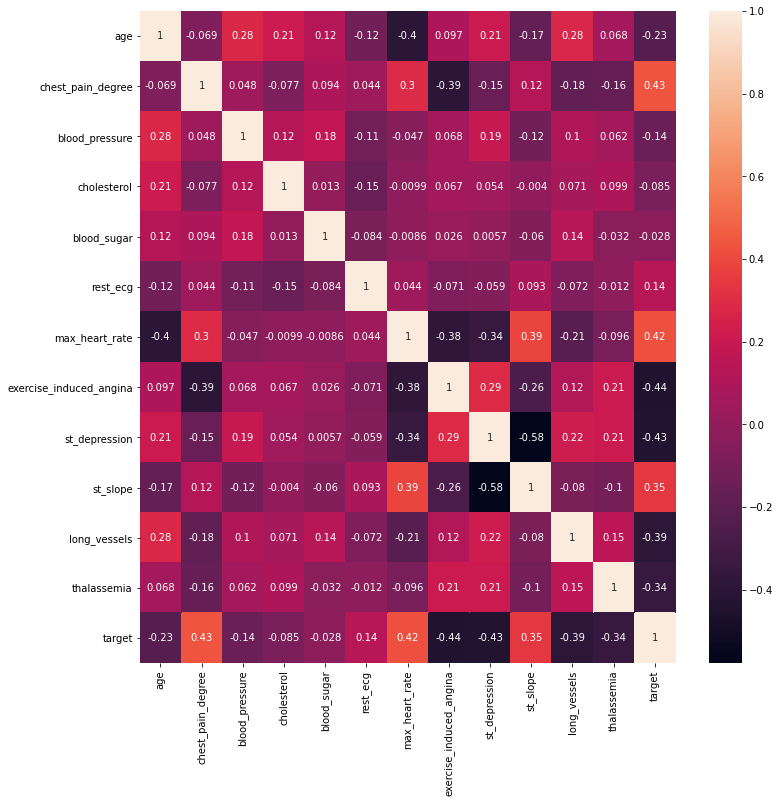

In [23]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,ax=ax)
plt.show()

We can make a lot of sense here, but the most important ones are;
* heart rate slows as age increases
* Chest pain decreases as the maximum heart rate achieved increases
* chest pain increases as the heart rate increases
* Heart disease decreases as exercise-induced ST depression increases with respect to rest
* heart disease decreases as vessel size increases
(etc.)

<a id = "5"></a>
# Machine learning-  Manuel And SckitLearns

In [24]:
#Encoding 
data = pd.get_dummies(data,columns = ['sex'],prefix = ['sex'])

In [25]:
#create the test and train
x = data.drop('target',axis=1)
y = data['target']

In [26]:
x['sex_male'] = x['sex_male'].astype(int)
x['sex_female'] = x['sex_female'].astype(int)

In [27]:
#create the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42, stratify=y)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.model_selection import cross_val_score

# All methods we use
knn_model=KNeighborsClassifier().fit(X_train,y_train)
lr_model=LogisticRegression().fit(X_train,y_train)
rf_model=RandomForestClassifier().fit(X_train,y_train)
lgb_model=LGBMClassifier().fit(X_train,y_train)
xgb_model=XGBClassifier().fit(X_train,y_train)
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)


models=[lr_model,rf_model,lgb_model,gbm_model,xgb_model,knn_model]

sc_fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

for model in models:
    names=model.__class__.__name__
    accuracy=cross_val_score(model,X_train,y_train,cv=sc_fold)
    print("{}s score:{}".format(names,accuracy.mean()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/lin

LogisticRegressions score:0.8541528239202657
RandomForestClassifiers score:0.8539313399778516
LGBMClassifiers score:0.8352159468438538
GradientBoostingClassifiers score:0.8211517165005539
XGBClassifiers score:0.8352159468438538
KNeighborsClassifiers score:0.6796234772978959


 <a id = "7"></a>
 # Descriptions of our models

<a id = "8"></a>
# Light GBM(lgbm):
# 1.What is Light GBM?
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.

Before is a diagrammatic representation by the makers of the Light GBM to explain the difference clearly.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194110/leaf.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194227/depth.png)

Leaf wise tree growth in Light GBM.

Leaf wise splits lead to increase in complexity and may lead to overfitting and it can be overcome by specifying another parameter max-depth which specifies the depth to which splitting will occur.

Below, we will see the steps to install Light GBM and run a model using it. We will be comparing the results with XGBOOST results to prove that you should take Light GBM in a ‘LIGHT MANNER’.

Let us look at some of the advantages of Light GBM.


# 2. Advantages of Light GBM
1. **Faster training speed and higher efficiency:** Light GBM use histogram based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.
2. **Lower memory usage:** Replaces continuous values to discrete bins which result in lower memory usage.
3. **Better accuracy than any other boosting algorithm:** It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy. However, it can sometimes lead to overfitting which can be avoided by setting the max_depth parameter.
4. **Compatibility with Large Datasets:** It is capable of performing equally good with large datasets with a significant reduction in training time as compared to XGBOOST.
Parallel learning supported.

# 3.Important Parameters of light GBM
* task : default value = train ; options = train , prediction ; Specifies the task we wish to perform which is either train or prediction.
* application: default=regression, type=enum, options= options :
* regression : perform regression task
* binary : Binary classification
* multiclass: Multiclass Classification
* lambdarank : lambdarank application
* data: type=string; training data , LightGBM will train from this data
* num_iterations: number of boosting iterations to be performed ; default=100; type=int
* num_leaves : number of leaves in one tree ; default = 31 ; type =int
* device : default= cpu ; options = gpu,cpu. Device on which we want to train our model. Choose GPU for faster training.
* max_depth: Specify the max depth to which tree will grow. This parameter is used to deal with overfitting.
* min_data_in_leaf: Min number of data in one leaf.
* feature_fraction: default=1 ; specifies the fraction of features to be taken for each iteration
* bagging_fraction: default=1 ; specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
* min_gain_to_split: default=.1 ; min gain to perform splitting
* max_bin : max number of bins to bucket the feature values.
* min_data_in_bin : min number of data in one bin
* num_threads: default=OpenMP_default, type=int ;Number of threads for Light GBM.
* label : type=string ; specify the label column
* categorical_feature : type=string ; specify the categorical features we want to use for training our model
* num_class: default=1 ; type=int ; used only for multi-class classification

Using model with sckitlearn


In [29]:
#import libary's
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.model_selection import cross_val_score


In [30]:
lgb_model=LGBMClassifier().fit(X_train,y_train)
sc_fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
names=lgb_model.__class__.__name__
accuracy=cross_val_score(lgb_model,X_train,y_train,cv=sc_fold)
print("{}s score:{}".format(names,accuracy.mean()))

LGBMClassifiers score:0.8352159468438538


<a id = "9"></a>
# Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In a binary logistic regression model, the dependent variable has two levels (categorical). Outputs with more than two values are modeled by multinomial logistic regression and, if the multiple categories are ordered, by ordinal logistic regression (for example the proportional odds ordinal logistic model[2]). The logistic regression model itself simply models probability of output in terms of input and does not perform statistical classification (it is not a classifier), though it can be used to make a classifier, for instance by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, below the cutoff as the other; this is a common way to make a binary classifier. The coefficients are generally not computed by a closed-form expression, unlike linear least squares; see § Model fitting.[](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression).)

In Data Science we can also create a model 2 methods; first is manual,second is Sckit learn
Sckit learn is the easiest way to get accuracy ("less code, more efficient work")
let's use both methods

In [31]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

# 1-First we need the normalize the data
![](https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863)

In [32]:
# Normalize the dataset
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [33]:
#Create the model (train test split)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

%70 of our data will be train and %30 will be test data 

In [34]:
#transpose matrices
# x_train = x_train.T
# y_train = y_train.T
# x_test = x_test.T
# y_test = y_test.T

In [35]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

Weight = 0.01
bias = 0.0

# 2-Sigmoid function 
![](https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba)

In [36]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

# 3-Forward-Backward Propagation 
![](https://miro.medium.com/max/3652/1*FczAiD6e8zWjWupOQkP_-Q.png)

# 4-Cost Function 
![](https://miro.medium.com/max/1400/1*tQTcGTLZqnI5rp3JYO_4NA.png)

# 5-Gradient Descent
![](https://miro.medium.com/max/3336/1*UwZgyyfmfO2I5UUfzCPfdw.png)

In [37]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [38]:
#Update parameters
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [39]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [40]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3636062506261712


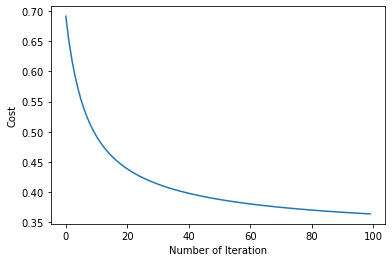

Manuel Test Accuracy: 79.12%


In [41]:
# logistic_regression(x_train,y_train,x_test,y_test,1,100)

<a id = "10"></a>
# K-Nearest Neighbour (KNN) Classification

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.[](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn?utm_source=adwords_ppc&utm_campaignid=10267161064&utm_adgroupid=102842301792&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1012783&gclid=Cj0KCQjwgo_5BRDuARIsADDEntQjahjkcs3b6XNbQFjct_fvxTcUVydMr1xVumoUV6aEYt-LRYh5ibQaAsECEALw_wcB)

# 1-How does the KNN algorithm work?
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.
![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

1-Calculate distance
2-Find closest neighbors
3-Vote for labels
![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)


<a id = "11"></a>
# Random Forest Classifier :
It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.
# Ensemble Algorithm :
Ensemble algorithms are those which combines more than one algorithms of same or different kind for classifying objects. For example, running prediction over Naive Bayes, SVM and Decision Tree and then taking vote for final consideration of class for test object.
![](https://miro.medium.com/max/718/0*a8KgF1IINziv7KIQ.png)
# Types of Random Forest models:
1. Random Forest Prediction for a classification problem:
f(x) = majority vote of all predicted classes over B trees
2. Random Forest Prediction for a regression problem:
f(x) = sum of all sub-tree predictions divided over B trees
# An Example of Random Forest Classification :
![](https://miro.medium.com/max/809/0*edh34CKyDT7sDHgL.png)
![](https://miro.medium.com/max/743/0*pCV1ZFzLBTJN5NhE.png)
The 9 decision tree classifiers shown above can be aggregated into a random forest ensemble which combines their input (on the right). The horizontal and vertical axes of the above decision tree outputs can be thought of as features x1 and x2. At certain values of each feature, the decision tree outputs a classification of “blue”, “green”, “red”, etc.
These above results are aggregated, through model votes or averaging, into a single
ensemble model that ends up outperforming any individual decision tree’s output.
# Features and Advantages of Random Forest :
1. It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier.
2. It runs efficiently on large databases.
3. It can handle thousands of input variables without variable deletion.
4. It gives estimates of what variables that are important in the classification.
5. It generates an internal unbiased estimate of the generalization error as the forest building progresses.
6. It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
# Disadvantages of Random Forest :
1. Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.
2. For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.
[](https://towardsdatascience.com/random-forest-classification-and-its-implementation-d5d840dbead0)


<a id = "12"></a>
# XGBoost Classifier

XGBoost is an open source library providing a high-performance implementation of gradient boosted decision trees. An underlying C++ codebase combined with a Python interface sitting on top makes for an extremely powerful yet easy to implement package.
The performance of XGBoost is no joke — it’s become the go-to library for winning many Kaggle competitions. Its gradient boosting implementation is second to none and there’s only more to come as the library continues to garner praise.
In this post we’re going to go through the basics of the XGBoost library. We’ll start with a practical explanation of how gradient boosting actually works and then go through a Python example of how XGBoost makes it oh-so quick and easy to do it.
# 1-Boosting Trees
With a regular machine learning model, like a decision tree, we’d simply train a single model on our dataset and use that for prediction. We might play around with the parameters for a bit or augment the data, but in the end we are still using a single model. Even if we build an ensemble, all of the models are trained and applied to our data separately.
**Boosting, on the other hand**, takes a more iterative approach. It’s still technically an ensemble technique in that many models are combined together to perform the final one, but takes a more clever approach.
Rather than training all of the models in isolation of one another, boosting trains models in succession, with each new model being trained to correct the errors made by the previous ones. Models are added sequentially until no further improvements can be made.
The advantage of this iterative approach is that the new models being added are focused on correcting the mistakes which were caused by other models. In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes!
**Gradient Boosting** specifically is an approach where new models are trained to predict the residuals (i.e errors) of prior models. I’ve outlined the approach in the diagram below.
![](https://miro.medium.com/max/519/1*A9myadIB_CqJv-EJA-G_bA.png)


# Your comments are very valuable to me, I am also new, please comment so that I can learn from you!!